In [2]:
#Hypertune random forest using Processed data set
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
data = pd.read_csv('Processed.csv')

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

#  Hyperparameter Tuning with GridSearchCV for Random Forest
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the model performance on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Optimized Model Accuracy: 89.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.75      0.60      0.67        10
           2       0.97      0.97      0.97        32
           3       0.81      1.00      0.90        13
           4       1.00      0.90      0.95        30
           5       0.91      1.00      0.95        40
           6       0.73      0.89      0.80         9
           7       0.83      0.56      0.67         9
           8       0.78      0.88      0.82         8
           9       1.00      0.64      0.78        14
          10       0.82      0.88      0.85        16
          11       0.96      0.96      0.96        28
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        17

    accuracy                           0.90       236
   macro avg       0.85      0.84      0.84       236
weighted avg       0.9

NameError: name 'confusion_matrix' is not defined

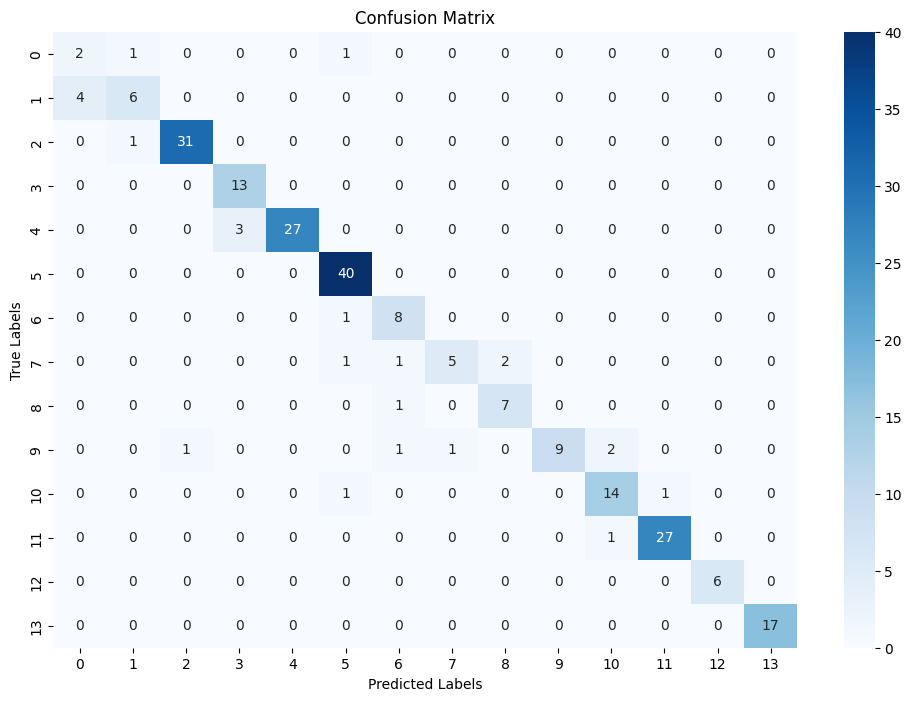

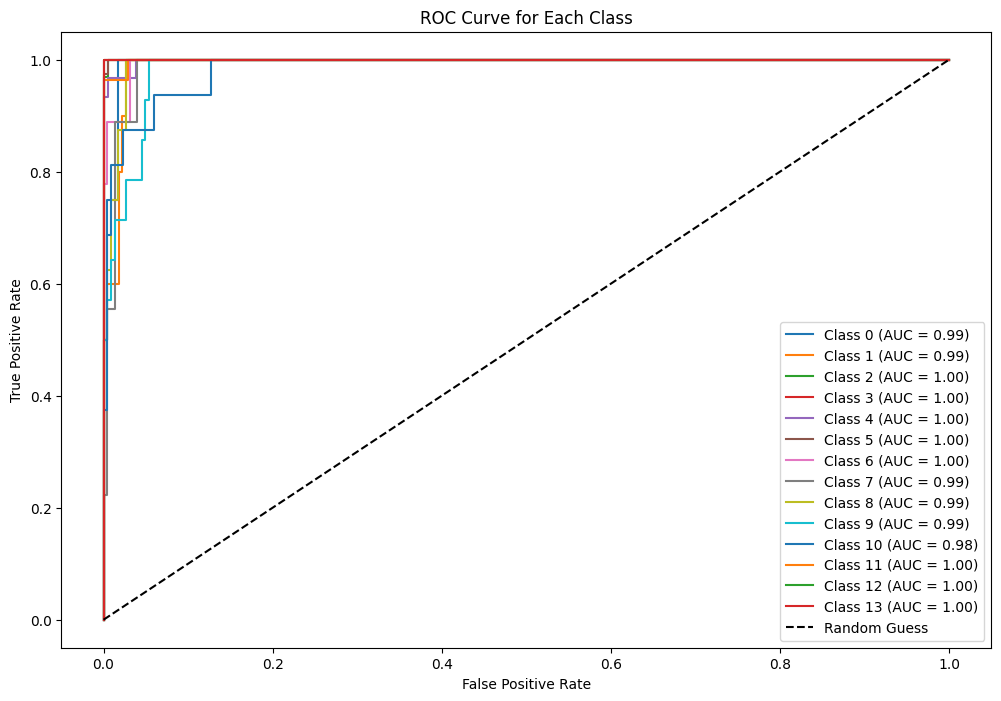

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
import seaborn as sns

# Create and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 5: ROC Curve and AUC
# Convert labels to binary one-vs-all encoding
from sklearn.preprocessing import label_binarize

y_test_binary = label_binarize(y_test, classes=best_rf_model.classes_)
y_pred_prob = best_rf_model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC AUC for each class
n_classes = y_test_binary.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {best_rf_model.classes_[i]} (AUC = {roc_auc[i]:.2f})")

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()



Optimized Model Accuracy: 96.97%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        45
           2       0.98      0.98      0.98        47
           3       0.98      0.94      0.96        52
           4       0.95      0.97      0.96        40
           5       0.98      0.94      0.96        47
           6       0.92      0.98      0.95        46
           7       0.96      0.98      0.97        45
           8       0.97      0.94      0.95        32
           9       0.98      1.00      0.99        43
          10       0.98      0.91      0.94        44
          11       0.94      1.00      0.97        44
          12       1.00      0.97      0.99        35
          13       0.97      1.00      0.99        39
          14       1.00      1.00      1.00        35

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.9

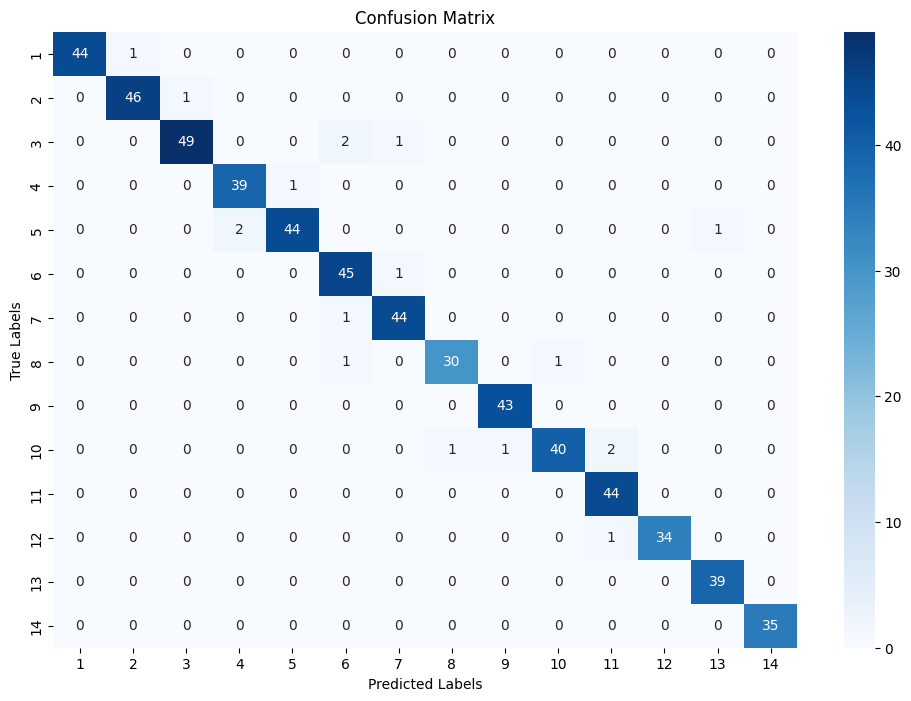

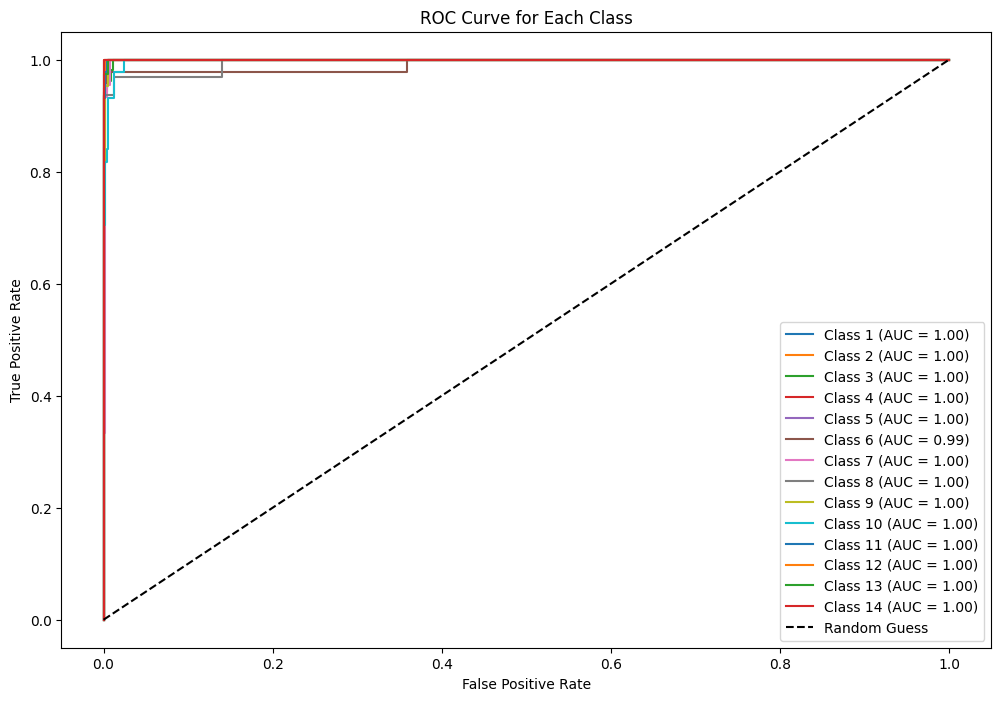

In [6]:
#Hypertune random forest using balanced_smote dataset
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
import seaborn as sns

# Load the dataset
data = pd.read_csv('balanced_smote.csv')

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

#  Hyperparameter Tuning with GridSearchCV for Random Forest
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the model performance on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 5: ROC Curve and AUC
# Convert labels to binary one-vs-all encoding
from sklearn.preprocessing import label_binarize

y_test_binary = label_binarize(y_test, classes=best_rf_model.classes_)
y_pred_prob = best_rf_model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC AUC for each class
n_classes = y_test_binary.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {best_rf_model.classes_[i]} (AUC = {roc_auc[i]:.2f})")

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()



Optimized Model Accuracy: 97.92%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        16
           7       1.00      0.82      0.90        11
           8       0.85      0.85      0.85        13
           9       1.00      1.00      1.00        18
          10       0.73      1.00      0.85        11
          11       1.00      0.92      0.96        26
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        21

    accuracy                           0.98       289
   macro avg       0.97      0.97      0.97       289
weighted avg       0.9

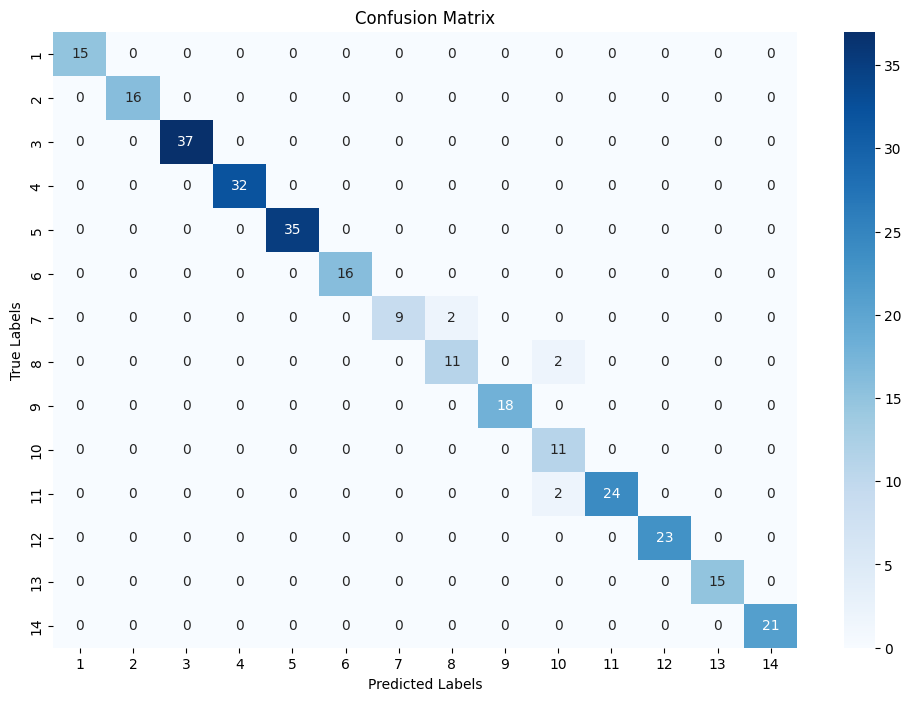

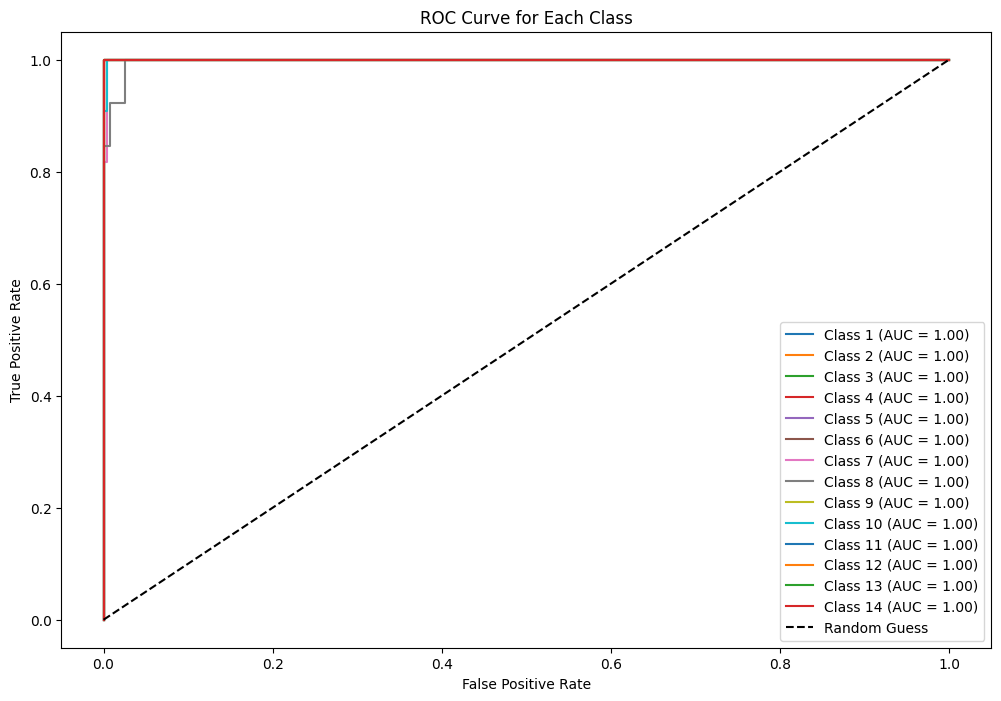

In [7]:
#Hypertune random forest using balanced_smoteenn dataset
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
import seaborn as sns

# Load the dataset
data = pd.read_csv('balanced_smoteenn.csv')

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

#  Hyperparameter Tuning with GridSearchCV for Random Forest
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model after tuning
best_rf_model = grid_search.best_estimator_

# Step 3: Evaluate the model performance on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 5: ROC Curve and AUC
# Convert labels to binary one-vs-all encoding
from sklearn.preprocessing import label_binarize

y_test_binary = label_binarize(y_test, classes=best_rf_model.classes_)
y_pred_prob = best_rf_model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC AUC for each class
n_classes = y_test_binary.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {best_rf_model.classes_[i]} (AUC = {roc_auc[i]:.2f})")

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
